In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv('../datasets_dan/USAverage_Energy_CO2_1970to2021.csv')

In [ ]:
df = pd.read_csv('../datasets_dan/')

In [4]:
#checking what we got here 
df.head()

,Year,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value
0,1970,21.733333,240566.5294,425347.2941,4693.098039,578433.6078,79804.33333
1,1971,21.880392,227513.7451,438534.2549,8096.843137,598852.0588,83572.74510
2,1972,22.996078,237441.7647,444754.8235,11446.098040,645473.6471,85921.68627
3,1973,23.625490,254119.9804,443045.9608,17846.627450,682471.1569,86489.03922
4,1974,22.750980,248058.9608,426069.7647,24942.843140,655306.1569,92977.49020


In [5]:
# setting year as the index 
df.set_index('Year', inplace=True)

In [6]:
# double checking 
df.head()

,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value
Year,,,,,,
1970,21.733333,240566.5294,425347.2941,4693.098039,578433.6078,79804.33333
1971,21.880392,227513.7451,438534.2549,8096.843137,598852.0588,83572.74510
1972,22.996078,237441.7647,444754.8235,11446.098040,645473.6471,85921.68627
1973,23.625490,254119.9804,443045.9608,17846.627450,682471.1569,86489.03922
1974,22.750980,248058.9608,426069.7647,24942.843140,655306.1569,92977.49020


In [7]:
df.shape

(52, 6)

In [8]:
df.dtypes

CO2_Value                 float64
Coal_Value                float64
Natural_Gas_Value         float64
Nuclear_Energy_Value      float64
Petroleum_Energy_Value    float64
Renewable_Energy_Value    float64
dtype: object

In [13]:
# getting rid of the commas to make energy sources into float
def comma_drop(int_str):
    try:
        # Remove the ',' from string and convert to float
        comma_drop_value = float(str(int_str).replace(',',''))

        return comma_drop_value

    except ValueError:
        # Handle the case where the input is not a valid number with '%' symbol
        print("Error: Invalid input. Please provide a valid integer string.")
        return None

In [50]:
# Remove the ',' from string
energy_co2['Coal_Value'] = energy_co2['Coal_Value'].str.replace(',', '')
energy_co2['Natural_Gas_Value'] = energy_co2['Natural_Gas_Value'].str.replace(',', '')
energy_co2['Nuclear_Energy_Value'] = energy_co2['Nuclear_Energy_Value'].str.replace(',', '')
energy_co2['Petroleum_Energy_Value'] = energy_co2['Petroleum_Energy_Value'].str.replace(',', '')
energy_co2['Renewable_Energy_Value'] = energy_co2['Renewable_Energy_Value'].str.replace(',', '')

In [51]:
# convert to float
energy_co2['Coal_Value'] = energy_co2['Coal_Value'].astype(float)
energy_co2['Natural_Gas_Value'] = energy_co2['Natural_Gas_Value'].astype(float)
energy_co2['Nuclear_Energy_Value'] = energy_co2['Nuclear_Energy_Value'].astype(float)
energy_co2['Petroleum_Energy_Value'] = energy_co2['Petroleum_Energy_Value'].astype(float)
energy_co2['Renewable_Energy_Value'] = energy_co2['Renewable_Energy_Value'].astype(float)

In [52]:
energy_co2.dtypes

State                      object
CO2_Value                 float64
Coal_Value                float64
Natural_Gas_Value         float64
Nuclear_Energy_Value      float64
Petroleum_Energy_Value    float64
Renewable_Energy_Value    float64
dtype: object

# Time Series Modeling

In [9]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

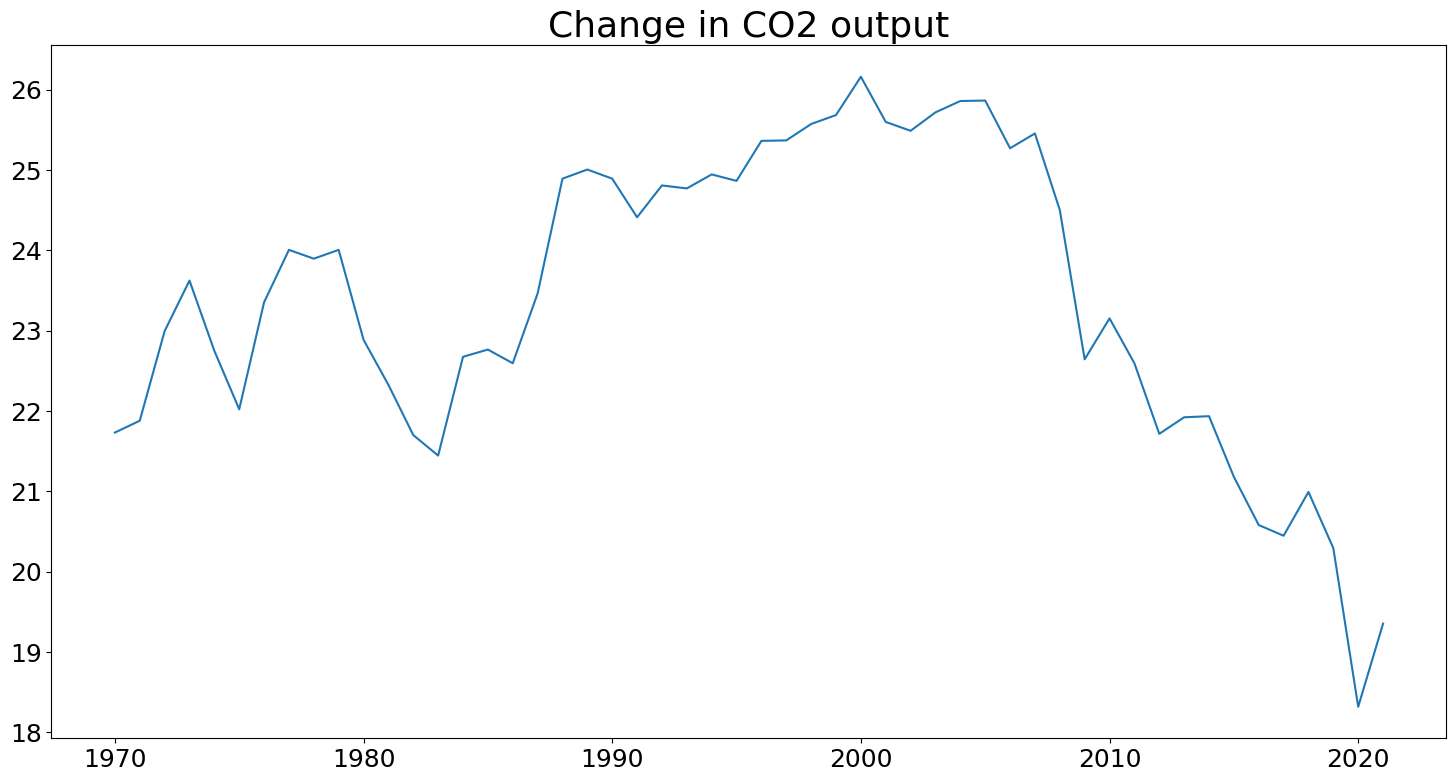

In [10]:
# looking at the changes in Co2 output 
plot_series(df, cols = ['CO2_Value'], title = "Change in CO2 output")

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
# Decompose time series into trend, seasonal, and residual components.
# decomp = seasonal_decompose(energy_co2['Coal_Value'])
# 
# Plot the decomposed time series.
# decomp.plot();

In [12]:
# Generate train/test split.
# when dealing with time series data, 
# make sure to make shuffle to False
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns =['CO2_Value']),
                                                    df['CO2_Value'],
                                                    test_size = 0.2, shuffle=False)

In [13]:
# Check shape to confirm we did this properly.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41, 5)
(11, 5)
(41,)
(11,)


In [14]:
# Import statsmodels.
import statsmodels.api as sm

In [15]:
# Before fitting a model in statsmodels, what do we need
# to do? (Hint: Think intercept.)
# for beta 0 create a constant of all 1
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)



# Confirm.
X_train.head()

,const,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value
Year,,,,,,
1970,1.0,240566.5294,425347.2941,4693.098039,578433.6078,79804.33333
1971,1.0,227513.7451,438534.2549,8096.843137,598852.0588,83572.74510
1972,1.0,237441.7647,444754.8235,11446.098040,645473.6471,85921.68627
1973,1.0,254119.9804,443045.9608,17846.627450,682471.1569,86489.03922
1974,1.0,248058.9608,426069.7647,24942.843140,655306.1569,92977.49020


In [16]:
# statsmodels won't be able to handle missing values.
X_train.dropna(inplace=True)

y_train = y_train[X_train.index]

In [17]:
X_train.index

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010],
      dtype='int64', name='Year')

In [18]:
# Remember that, in statsmodels, we pass our data 
# in when we instantiate the model!

lm = sm.OLS(y_train, X_train)

In [19]:
# Then we fit our model.
lm_results = lm.fit()

In [20]:
# Display our summary!
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:              CO2_Value   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     43.50
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           4.74e-14
Time:                        12:25:35   Log-Likelihood:                -30.993
No. Observations:                  41   AIC:                             73.99
Df Residuals:                      35   BIC:                             84.27
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     14

In [21]:
# Generate predicted test values.
lm_results.predict(X_test)

Year
2011    22.294540
2012    21.501604
2013    21.467009
2014    21.304467
2015    20.421949
2016    19.496446
2017    18.906890
2018    18.716244
2019    17.871305
2020    16.273612
2021    16.894510
dtype: float64

In [22]:
# Import R2 score and MSE.
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
# Calculate R2 score.
r2_score(y_test, lm_results.predict(X_test))

-0.6948456491049053

In [24]:
# Calculate RMSE.
mean_squared_error(y_test, lm_results.predict(X_test)) ** 0.5

1.5427354430092108

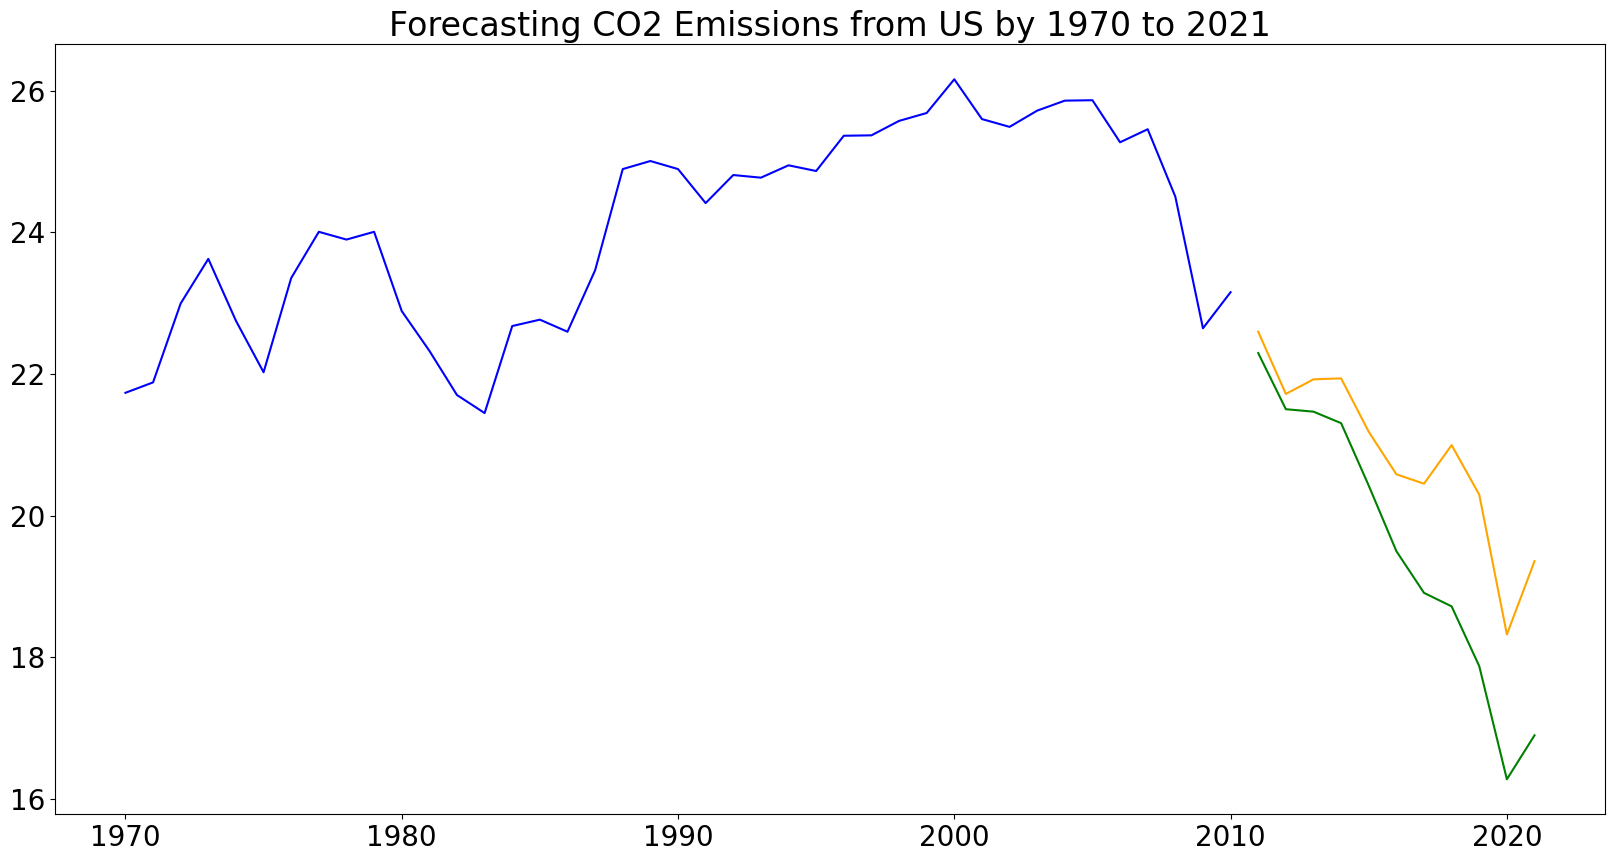

In [26]:
# Let's plot our predictions! 

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'orange')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'green')

# Set label.
plt.title(label = 'Forecasting CO2 Emissions from US by 1970 to 2021', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [2]:
co2 = pd.read_csv('../datasets_dan/co2_emission.csv')
coal = pd.read_csv('../datasets_dan/coal.csv')
natural_gas = pd.read_csv('../datasets_dan/natural_gas.csv')
nuclear = pd.read_csv('../datasets_dan/nuclear.csv')
petroleum = pd.read_csv('../datasets_dan/petroleum.csv')
renewable_energy = pd.read_csv('../datasets_dan/renewable_energy.csv')

In [3]:
co2 = co2.dropna(axis=1, how='all')
coal = coal.dropna(axis=1, how='all')
natural_gas = natural_gas.dropna(axis=1, how='all')
nuclear = nuclear.dropna(axis=1, how='all')
petroleum = petroleum.dropna(axis=1, how='all')
renewable_energy = renewable_energy.dropna(axis=1, how='all')

In [8]:
# Melt the CO2 DataFrame
df_co2 = pd.melt(co2, id_vars=['State'], var_name='Year', value_name='CO2')

# Display the resulting DataFrame
df_co2.head()

,State,Year,CO2
0,Alabama,1970,29.7
1,Alaska,1970,37.3
2,Arizona,1970,13.9
3,Arkansas,1970,18.7
4,California,1970,14.7


In [7]:
# Melt the remaining DataFrames for all the energy emissions
df_coal = pd.melt(coal, id_vars=['State'], var_name='Year', value_name='Coal')

df_natural_gas = pd.melt(natural_gas, id_vars=['State'], var_name='Year', value_name='natural_gas')

df_nuclear = pd.melt(nuclear, id_vars=['State'], var_name='Year', value_name='nuclear')

df_petroleum = pd.melt(petroleum, id_vars=['State'], var_name='Year', value_name='petroleum')

df_renewable_energy = pd.melt(renewable_energy, id_vars=['State'], var_name='Year', value_name='renewable_energy')

In [9]:
df_coal.head()

,State,Year,Coal
0,AK,1960,"7,189"
1,AL,1960,"395,400"
2,AR,1960,356
3,AZ,1960,210
4,CA,1960,"35,903"


In [10]:
df_natural_gas.head()

,State,Year,natural_gas
0,AK,1960,"2,034"
1,AL,1960,"190,706"
2,AR,1960,"222,202"
3,AZ,1960,"140,275"
4,CA,1960,"1,301,826"


In [11]:
df_nuclear.head()

,State,Year,nuclear
0,AK,1960,0
1,AL,1960,0
2,AR,1960,0
3,AZ,1960,0
4,CA,1960,1


In [12]:
df_petroleum.head()

,State,Year,petroleum
0,AK,1960,"45,410"
1,AL,1960,"236,010"
2,AR,1960,"148,055"
3,AZ,1960,"121,344"
4,CA,1960,"1,836,912"


In [13]:
df_renewable_energy.head()

,State,Year,renewable_energy
0,AK,1960,"6,800"
1,AL,1960,"112,809"
2,AR,1960,"48,104"
3,AZ,1960,"36,181"
4,CA,1960,"270,161"


In [ ]:
# concatenating all the energy sources
df_energy_sources = 

In [3]:
df_poll_to_2023.columns

Index(['Unnamed: 0', 'Date', 'Address', 'State', 'County', 'City', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI'],
      dtype='object')

In [4]:
# looking at the column sets for energy set
df_energy.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [5]:
# df_poll_to_2023
df_poll_to_2023.head()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [6]:
df_energy.shape

(3649, 21)

In [7]:
df_USA = df_energy[df_energy['Entity'] == 'United States'].copy()

In [8]:
df_USA

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3502,United States,2000,100.0,100.0,NaN,NaN,5.43,2697.28,753.89,350.93,...,93999.860,6.73,5775810.000,4.027357,4.127484,36334.90878,36,9833517.0,37.09024,-95.712891
3503,United States,2001,100.0,100.0,NaN,NaN,4.68,2678.68,768.83,280.06,...,90772.180,6.54,5748260.000,3.421371,0.998341,37133.24281,36,9833517.0,37.09024,-95.712891
3504,United States,2002,100.0,100.0,NaN,NaN,4.84,2727.83,780.06,336.34,...,91201.060,6.50,5593029.785,4.015507,1.741695,38023.16111,36,9833517.0,37.09024,-95.712891
3505,United States,2003,100.0,100.0,NaN,NaN,5.33,2756.03,763.73,349.18,...,90619.110,6.33,5658990.234,4.180040,2.861211,39496.48588,36,9833517.0,37.09024,-95.712891
3506,United States,2004,100.0,100.0,NaN,NaN,5.48,2818.28,788.53,345.14,...,91504.484,6.22,5738290.039,4.101511,3.798891,41712.80107,36,9833517.0,37.09024,-95.712891
3507,United States,2005,100.0,100.0,NaN,NaN,5.84,2899.96,781.99,353.04,...,90654.530,6.04,5753490.234,4.219231,3.513214,44114.74778,36,9833517.0,37.09024,-95.712891
3508,United States,2006,100.0,100.0,NaN,NaN,6.40,2878.56,787.22,381.16,...,89067.040,5.82,5653080.078,4.678861,2.854972,46298.73144,36,9833517.0,37.09024,-95.712891
3509,United States,2007,100.0,100.0,NaN,NaN,6.30,2988.24,806.42,347.91,...,89395.140,5.81,5736319.824,4.373009,1.876171,47975.96770,36,9833517.0,37.09024,-95.712891
3510,United States,2008,100.0,100.0,NaN,NaN,6.85,2924.21,806.21,377.11,...,86378.650,5.67,5558379.883,5.004550,-0.136580,48382.55845,36,9833517.0,37.09024,-95.712891
3511,United States,2009,100.0,100.0,NaN,NaN,7.35,2725.41,798.85,415.56,...,81376.180,5.53,5156430.176,5.800006,-2.536757,47099.98047,36,9833517.0,37.09024,-95.712891


In [9]:
df_USA.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [10]:
df_USA.set_index(df_USA['Year'], inplace=True)
df_USA

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
Year,,,,,,,,,,,,,,,,,,,,,
2000,United States,2000,100.0,100.0,NaN,NaN,5.43,2697.28,753.89,350.93,...,93999.860,6.73,5775810.000,4.027357,4.127484,36334.90878,36,9833517.0,37.09024,-95.712891
2001,United States,2001,100.0,100.0,NaN,NaN,4.68,2678.68,768.83,280.06,...,90772.180,6.54,5748260.000,3.421371,0.998341,37133.24281,36,9833517.0,37.09024,-95.712891
2002,United States,2002,100.0,100.0,NaN,NaN,4.84,2727.83,780.06,336.34,...,91201.060,6.50,5593029.785,4.015507,1.741695,38023.16111,36,9833517.0,37.09024,-95.712891
2003,United States,2003,100.0,100.0,NaN,NaN,5.33,2756.03,763.73,349.18,...,90619.110,6.33,5658990.234,4.180040,2.861211,39496.48588,36,9833517.0,37.09024,-95.712891
2004,United States,2004,100.0,100.0,NaN,NaN,5.48,2818.28,788.53,345.14,...,91504.484,6.22,5738290.039,4.101511,3.798891,41712.80107,36,9833517.0,37.09024,-95.712891
2005,United States,2005,100.0,100.0,NaN,NaN,5.84,2899.96,781.99,353.04,...,90654.530,6.04,5753490.234,4.219231,3.513214,44114.74778,36,9833517.0,37.09024,-95.712891
2006,United States,2006,100.0,100.0,NaN,NaN,6.40,2878.56,787.22,381.16,...,89067.040,5.82,5653080.078,4.678861,2.854972,46298.73144,36,9833517.0,37.09024,-95.712891
2007,United States,2007,100.0,100.0,NaN,NaN,6.30,2988.24,806.42,347.91,...,89395.140,5.81,5736319.824,4.373009,1.876171,47975.96770,36,9833517.0,37.09024,-95.712891
2008,United States,2008,100.0,100.0,NaN,NaN,6.85,2924.21,806.21,377.11,...,86378.650,5.67,5558379.883,5.004550,-0.136580,48382.55845,36,9833517.0,37.09024,-95.712891


In [11]:
cols_to_drop = ['Entity', 'Year', 'Access to electricity (% of population)',
                'Access to clean fuels for cooking',
                'Renewable-electricity-generating-capacity-per-capita',
                'Financial flows to developing countries (US $)', 
                'Land Area(Km2)', 'Latitude', 'Longitude','Value_co2_emissions_kt_by_country']

# Drop the specified columns in-place
df_USA_dropped = df_USA.drop(columns=cols_to_drop)

In [12]:
df_USA_dropped

,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2)
Year,,,,,,,,,,,
2000,5.43,2697.28,753.89,350.93,29.058150,93999.860,6.73,4.027357,4.127484,36334.90878,36
2001,4.68,2678.68,768.83,280.06,28.138706,90772.180,6.54,3.421371,0.998341,37133.24281,36
2002,4.84,2727.83,780.06,336.34,29.040926,91201.060,6.50,4.015507,1.741695,38023.16111,36
2003,5.33,2756.03,763.73,349.18,28.765244,90619.110,6.33,4.180040,2.861211,39496.48588,36
2004,5.48,2818.28,788.53,345.14,28.686348,91504.484,6.22,4.101511,3.798891,41712.80107,36
2005,5.84,2899.96,781.99,353.04,28.129686,90654.530,6.04,4.219231,3.513214,44114.74778,36
2006,6.40,2878.56,787.22,381.16,28.870703,89067.040,5.82,4.678861,2.854972,46298.73144,36
2007,6.30,2988.24,806.42,347.91,27.865068,89395.140,5.81,4.373009,1.876171,47975.96770,36
2008,6.85,2924.21,806.21,377.11,28.808554,86378.650,5.67,5.004550,-0.136580,48382.55845,36


In [13]:
# ONly Run Once to get rid of Density
df_USA_dropped = df_USA_dropped.iloc[:,:-1]


In [14]:
df_USA_dropped

,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita
Year,,,,,,,,,,
2000,5.43,2697.28,753.89,350.93,29.058150,93999.860,6.73,4.027357,4.127484,36334.90878
2001,4.68,2678.68,768.83,280.06,28.138706,90772.180,6.54,3.421371,0.998341,37133.24281
2002,4.84,2727.83,780.06,336.34,29.040926,91201.060,6.50,4.015507,1.741695,38023.16111
2003,5.33,2756.03,763.73,349.18,28.765244,90619.110,6.33,4.180040,2.861211,39496.48588
2004,5.48,2818.28,788.53,345.14,28.686348,91504.484,6.22,4.101511,3.798891,41712.80107
2005,5.84,2899.96,781.99,353.04,28.129686,90654.530,6.04,4.219231,3.513214,44114.74778
2006,6.40,2878.56,787.22,381.16,28.870703,89067.040,5.82,4.678861,2.854972,46298.73144
2007,6.30,2988.24,806.42,347.91,27.865068,89395.140,5.81,4.373009,1.876171,47975.96770
2008,6.85,2924.21,806.21,377.11,28.808554,86378.650,5.67,5.004550,-0.136580,48382.55845


In [15]:
df_USA_dropped['Renewable energy share in the total final energy consumption (%)'] = df_USA_dropped['Renewable energy share in the total final energy consumption (%)'].fillna(value=10.81)

In [16]:
df_USA_dropped['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'] = df_USA_dropped['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(value=4.91)

In [17]:
df_USA_dropped

,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita
Year,,,,,,,,,,
2000,5.43,2697.28,753.89,350.93,29.058150,93999.860,6.73,4.027357,4.127484,36334.90878
2001,4.68,2678.68,768.83,280.06,28.138706,90772.180,6.54,3.421371,0.998341,37133.24281
2002,4.84,2727.83,780.06,336.34,29.040926,91201.060,6.50,4.015507,1.741695,38023.16111
2003,5.33,2756.03,763.73,349.18,28.765244,90619.110,6.33,4.180040,2.861211,39496.48588
2004,5.48,2818.28,788.53,345.14,28.686348,91504.484,6.22,4.101511,3.798891,41712.80107
2005,5.84,2899.96,781.99,353.04,28.129686,90654.530,6.04,4.219231,3.513214,44114.74778
2006,6.40,2878.56,787.22,381.16,28.870703,89067.040,5.82,4.678861,2.854972,46298.73144
2007,6.30,2988.24,806.42,347.91,27.865068,89395.140,5.81,4.373009,1.876171,47975.96770
2008,6.85,2924.21,806.21,377.11,28.808554,86378.650,5.67,5.004550,-0.136580,48382.55845


In [18]:
df_USA_dropped.dtypes

Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Renewables (% equivalent primary energy)                            float64
gdp_growth                                                          float64
gdp_per_capita                                                      float64
dtype: object

In [19]:
df_USA_dropped.shape

(21, 10)

In [20]:
df_USA_dropped.isna().sum()

Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Renewables (% equivalent primary energy)                            0
gdp_growth                                                          0
gdp_per_capita                                                      0
dtype: int64

In [21]:
# using the USA cleaned dataset
df_USA_dropped.to_csv('../datasets/df_USA_cleaned.csv', index=False)

# Trying to Resample the Data to see what we get

In [25]:
# df_poll_to_2023 = pd.read_csv('../datasets/pollution_2000_2023.csv')
df_USA_cleaned = pd.read_csv('../datasets/df_USA_cleaned.csv')

In [23]:
# quickly cleaning up the pollution dataset 
# df_USA_renewables.set_index('Year')

df_poll_to_2023['Date'] = pd.to_datetime(df_poll_to_2023['Date'])
df_poll_to_2023.set_index('Date',inplace=True)
df_poll_to_2023.drop(columns=["Unnamed: 0", "Address","County", "City"], inplace=True)
df_poll_to_2023

,State,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
Date,,,,,,,,,,,,,,,,,
2000-01-01,Arizona,0.019765,0.040,10,37,0.878947,2.2,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
2000-01-02,Arizona,0.015882,0.032,10,30,1.066667,2.3,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2000-01-03,Arizona,0.009353,0.016,9,15,1.762500,2.5,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
2000-01-04,Arizona,0.015882,0.033,9,31,1.829167,3.0,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
2000-01-05,Arizona,0.007353,0.012,9,11,2.700000,3.7,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,Wyoming,0.043941,0.050,12,46,0.000000,0.0,0,0.0,0.117391,0.3,7,0.0,2.282609,4.3,6,4
2023-06-27,Wyoming,0.046235,0.054,12,50,0.000000,0.0,0,0.0,0.091667,0.2,8,0.0,2.283333,5.2,6,5
2023-06-28,Wyoming,0.046588,0.055,7,51,0.000000,0.0,0,0.0,0.091667,0.2,6,0.0,2.487500,4.8,19,4


In [27]:
df_USA_cleaned.head()

,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita
0,5.43,2697.28,753.89,350.93,29.058150,93999.860,6.73,4.027357,4.127484,36334.90878
1,4.68,2678.68,768.83,280.06,28.138706,90772.180,6.54,3.421371,0.998341,37133.24281
2,4.84,2727.83,780.06,336.34,29.040926,91201.060,6.50,4.015507,1.741695,38023.16111
3,5.33,2756.03,763.73,349.18,28.765244,90619.110,6.33,4.180040,2.861211,39496.48588
4,5.48,2818.28,788.53,345.14,28.686348,91504.484,6.22,4.101511,3.798891,41712.80107


In [28]:
# Downsample the dataset
downsampled_df = df_poll_to_2023.groupby('State', group_keys=False).apply(lambda x: x.sample(min(len(x), 1000)))

In [29]:
from sklearn.utils import resample

# Upsample the dataset
upsampled_df = df_poll_to_2023.groupby('State').apply(lambda x: resample(x, replace=True, n_samples=1000))

In [30]:
upsampled_df.head()

State   O3 Mean  O3 1st Max Value  O3 1st Max Hour  \
State   Date                                                               
Alabama 2022-03-17  Alabama  0.037059             0.046               10   
        2014-05-24  Alabama  0.034235             0.062                9   
        2022-02-06  Alabama  0.018353             0.038                9   
        2020-09-24  Alabama  0.011706             0.019                8   
        2018-11-07  Alabama  0.020294             0.024                8   

                    O3 AQI   CO Mean  CO 1st Max Value  CO 1st Max Hour  \
State   Date                                                              
Alabama 2022-03-17      43  0.433333               0.7               10   
        2014-05-24      74  0.308333               0.5                5   
        2022-02-06      35  0.270833               0.4               23   
        2020-09-24      18  0.200000               0.2                0   
        2018-11-07      22  0.227778               0.5                0   

                    CO AQI  SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  \
State   Date                                                                
Alabama 2022-03-17     8.0  0.472727                1.2                15   
        2014-05-24     6.0  2.354545                9.8                22   
        2022-02-06     5.0  0.333333                2.2                23   
        2020-09-24     2.0  0.319048                0.4                10   
        2018-11-07     6.0  0.961905                3.2                15   

                    SO2 AQI   NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  \
State   Date                                                                  
Alabama 2022-03-17      1.0  14.904545               31.1                 8   
        2014-05-24     13.0  11.729167               25.1                 0   
        2022-02-06      3.0  15.333333               30.6                20   
        2020-09-24      0.0   6.852381               17.4                16   
        2018-11-07      4.0   8.009524               12.6                 4   

                    NO2 AQI  
State   Date                 
Alabama 2022-03-17       29  
        2014-05-24       24  
        2022-02-06       28  
        2020-09-24       16  
        2018-11-07       11

In [37]:
upsampled_df[(upsampled_df['State'] == "Alaska")]

State   O3 Mean  O3 1st Max Value  O3 1st Max Hour  \
State  Date                                                              
Alaska 2016-01-16  Alaska  0.001000             0.001                7   
       2019-04-29  Alaska  0.039059             0.048               12   
       2018-09-06  Alaska  0.012294             0.020               10   
       2015-03-01  Alaska  0.014412             0.026                9   
       2017-12-05  Alaska  0.014765             0.031               19   
...                   ...       ...               ...              ...   
       2014-07-25  Alaska  0.011235             0.016               11   
       2015-02-26  Alaska  0.005941             0.014                9   
       2014-08-02  Alaska  0.014588             0.017                7   
       2018-05-11  Alaska  0.029529             0.034               12   
       2016-07-06  Alaska  0.016941             0.022               11   

                   O3 AQI   CO Mean  CO 1st Max Value  CO 1st Max Hour  \
State  Date                                                              
Alaska 2016-01-16       1  0.758333               1.2               21   
       2019-04-29      44  0.200000               0.2                0   
       2018-09-06      19  0.236364               0.3               20   
       2015-03-01      24  0.345833               0.5               21   
       2017-12-05      29  0.620833               1.0               16   
...                   ...       ...               ...              ...   
       2014-07-25      15  0.179167               0.2                0   
       2015-02-26      13  0.470833               0.7               22   
       2014-08-02      16  0.200000               0.2                0   
       2018-05-11      31  0.125000               0.2                0   
       2016-07-06      20  0.100000               0.1                0   

                   CO AQI   SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  \
State  Date                                                                 
Alaska 2016-01-16    14.0  16.183333               22.0                20   
       2019-04-29     2.0   2.791304                5.5                 2   
       2018-09-06     3.0   3.379167                4.0                18   
       2015-03-01     6.0   7.347826               15.5                21   
       2017-12-05    11.0   9.216667               15.9                 7   
...                   ...        ...                ...               ...   
       2014-07-25     2.0   1.245833                2.2                23   
       2015-02-26     8.0   9.386957               14.8                 4   
       2014-08-02     2.0   1.613043                1.9                22   
       2018-05-11     2.0   2.470833                3.6                 9   
       2016-07-06     1.0   1.345833                3.1                21   

                   SO2 AQI   NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  \
State  Date                                                                  
Alaska 2016-01-16     31.0  24.195455               31.3                22   
       2019-04-29      7.0   5.458333               15.2                 7   
       2018-09-06      6.0   3.704167                7.9                20   
       2015-03-01     21.0  11.445833               28.6                21   
       2017-12-05     21.0  21.016667               38.2                10   
...                    ...        ...                ...               ...   
       2014-07-25      3.0   1.984615                5.6                23   
       2015-02-26     20.0  20.027273               31.8                18   
       2014-08-02      1.0   0.770833                2.5                22   
       2018-05-11      4.0   1.704167                6.2                22   
       2016-07-06      4.0   2.163636                8.8                21   

                   NO2 AQI  
State  Date                 
Alaska 2016-01-16  

In [36]:
upsampled_df[['State', 'O3 Mean']]

State   O3 Mean
State   Date                         
Alabama 2022-03-17  Alabama  0.037059
        2014-05-24  Alabama  0.034235
        2022-02-06  Alabama  0.018353
        2020-09-24  Alabama  0.011706
        2018-11-07  Alabama  0.020294
...                     ...       ...
Wyoming 2014-06-06  Wyoming  0.038059
        2016-01-06  Wyoming  0.024647
        2016-05-07  Wyoming  0.048765
        2017-11-07  Wyoming  0.009294
        2020-02-25  Wyoming  0.034118

[48000 rows x 2 columns]

# Try to elongate data based on cities

In [19]:
print(df_poll_to_2023.columns)

Index(['Unnamed: 0', 'Date', 'Address', 'State', 'County', 'City', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI'],
      dtype='object')


In [20]:
df_poll_to_2023.drop(columns=["Unnamed: 0", "Address","County", "City"], inplace=True)

df_poll_to_2023.head()

,Date,State,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,Arizona,0.019765,0.040,10,37,0.878947,2.2,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,Arizona,0.015882,0.032,10,30,1.066667,2.3,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,Arizona,0.009353,0.016,9,15,1.762500,2.5,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,Arizona,0.015882,0.033,9,31,1.829167,3.0,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,Arizona,0.007353,0.012,9,11,2.700000,3.7,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [21]:
print(df_poll_to_2023.shape)

(665414, 18)


In [22]:
df_poll_to_2023[['Date']].value_counts()

Date      
2019-12-04    104
2019-12-11    104
2019-12-06    103
2019-12-13    103
2019-11-27    103
             ... 
2023-09-13      8
2023-09-17      8
2023-09-16      8
2023-09-06      8
2023-09-07      7
Name: count, Length: 8674, dtype: int64

In [23]:
df_poll_to_2023['State'].value_counts()

State
California              201244
Pennsylvania             54142
Texas                    38980
Arizona                  25118
New York                 22685
Virginia                 20571
Colorado                 16198
North Carolina           14449
Illinois                 13803
Ohio                     13376
Maryland                 13086
Hawaii                   12904
Utah                     12104
Oklahoma                 11919
New Jersey               11762
Arkansas                 11277
District Of Columbia     10517
Connecticut              10255
Iowa                     10063
Kansas                    9686
Missouri                  9653
Maine                     9378
Florida                   8738
Louisiana                 8390
Massachusetts             7581
Nevada                    7109
Kentucky                  6212
Indiana                   5855
Wyoming                   5574
Oregon                    5300
Rhode Island              5194
North Dakota              5194
Ne

In [24]:
df_poll_to_2023['Date']

0         2000-01-01
1         2000-01-02
2         2000-01-03
3         2000-01-04
4         2000-01-05
             ...    
665409    2023-06-26
665410    2023-06-27
665411    2023-06-28
665412    2023-06-29
665413    2023-06-30
Name: Date, Length: 665414, dtype: object

In [25]:
# Assuming df is your DataFrame
df_poll_to_2023['Date'] = pd.to_datetime(df_poll_to_2023['Date'])
df_poll_to_2023['Year'] = df_poll_to_2023['Date'].dt.year
df_poll_to_2023['Month'] = df_poll_to_2023['Date'].dt.month

# List of columns to be averaged
columns_to_average = ['O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
                       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
                       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
                       'NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI']

# Group by State, Year, and Month and calculate the mean for each group
df_grouped = df_poll_to_2023.groupby(['State', 'Year', 'Month'])[columns_to_average].mean().reset_index()

In [26]:
df_grouped

,State,Year,Month,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,Alabama,2013,12,0.012687,0.020000,12.516129,18.548387,0.211873,0.367742,9.612903,4.129032,0.771913,4.996774,10.419355,6.580645,12.065635,23.141935,13.838710,21.387097
1,Alabama,2014,1,0.016801,0.025333,10.166667,23.666667,0.232553,0.383333,11.833333,4.333333,0.825152,4.083333,8.833333,5.333333,16.352841,35.550000,8.500000,34.166667
2,Alabama,2014,2,0.020348,0.030000,11.818182,27.727273,0.245808,0.427273,9.000000,4.909091,1.471920,6.081818,11.636364,7.909091,10.179751,23.463636,15.181818,21.636364
3,Alabama,2014,3,0.023189,0.033037,10.074074,30.592593,0.233896,0.370370,9.148148,4.185185,0.789043,5.244444,9.259259,7.074074,10.870566,24.951852,13.666667,23.074074
4,Alabama,2014,4,0.029648,0.039071,9.642857,37.357143,0.197769,0.285714,5.535714,3.071429,0.927472,4.432143,9.357143,5.642857,7.761479,22.564286,13.035714,20.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8818,Wyoming,2023,2,0.039483,0.043929,9.678571,40.750000,0.109375,0.128571,1.785714,1.285714,0.061129,0.228571,8.500000,0.000000,3.469859,12.342857,12.500000,11.285714
8819,Wyoming,2023,3,0.040695,0.046290,10.419355,42.903226,0.091156,0.116129,3.193548,1.161290,0.030868,0.206452,9.548387,0.000000,3.219036,9.309677,11.129032,8.451613
8820,Wyoming,2023,4,0.042145,0.049448,9.068966,46.931034,0.084580,0.100000,0.827586,1.000000,0.036617,0.234483,7.862069,0.103448,2.776718,12.031034,10.344828,10.862069
8821,Wyoming,2023,5,0.044548,0.052677,9.419355,50.935484,0.046024,0.074194,1.935484,0.741935,0.036167,0.132258,8.483871,0.000000,2.893524,7.996774,7.870968,7.225806


In [27]:
# Create a dataframe for the years 2000-2016
df_2000_2017 = df_grouped[(df_grouped['Year'] >= 2000) & (df_grouped['Year'] <= 2017)]

# Create a dataframe for the years 2017-2023
df_2018_2023 = df_grouped[(df_grouped['Year'] >= 2018) & (df_grouped['Year'] <= 2023)]

In [28]:
df_2000_2017.shape

(6063, 19)

In [29]:
year_2000_pollution = df_2000_2017[df_2000_2017['Year']==2000].reset_index()

In [30]:
# Need to relabel these as monthly mean values 
year_2000_pollution

,index,State,Year,Month,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,169,Arizona,2000,1,0.018242,0.033239,9.945652,31.891304,1.336178,2.400000,10.130435,27.250000,4.289626,9.315217,13.586957,13.304348,50.773189,99.771739,16.380435,74.826087
1,170,Arizona,2000,2,0.023883,0.042200,10.387500,44.050000,0.985815,1.772500,9.212500,20.162500,3.050312,7.375000,11.500000,10.562500,39.194172,82.975000,15.987500,68.200000
2,171,Arizona,2000,3,0.027969,0.045933,10.483146,44.157303,0.690650,1.179775,7.966292,13.426966,2.996043,5.085393,11.000000,6.943820,26.624147,51.382022,15.786517,48.887640
3,172,Arizona,2000,4,0.034200,0.054920,10.760000,58.040000,0.661423,1.154000,9.160000,13.220000,2.023192,5.800000,9.680000,8.320000,23.464792,53.160000,15.480000,50.880000
4,173,Arizona,2000,5,0.038819,0.059276,10.379310,70.620690,0.539292,0.920690,6.086207,10.568966,2.187372,5.706897,9.724138,8.103448,8.825951,25.300000,13.568966,23.793103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,8604,Wisconsin,2000,6,0.034779,0.043933,11.966667,45.566667,0.208750,0.330000,5.366667,3.666667,3.290399,15.300000,8.133333,21.000000,13.297421,30.233333,14.733333,28.633333
209,8605,Wisconsin,2000,7,0.036568,0.046464,12.142857,49.071429,0.184673,0.285714,7.142857,3.178571,2.394345,5.535714,3.285714,8.071429,10.294430,25.464286,12.250000,24.035714
210,8606,Wisconsin,2000,8,0.038030,0.048387,12.161290,50.064516,0.286962,0.422581,9.258065,4.806452,2.948165,11.838710,4.451613,15.225806,11.636551,27.322581,12.709677,25.709677
211,8607,Wisconsin,2000,9,0.029248,0.038630,12.333333,37.185185,0.379475,0.633333,7.444444,7.296296,2.630732,7.259259,3.555556,10.407407,12.954059,27.518519,13.259259,26.000000


In [31]:
year_2000_pollution.isnull().sum()

index                0
State                0
Year                 0
Month                0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
dtype: int64

In [32]:
# Define the columns you want to add
columns_to_add = ['Renewable energy share in the total final energy consumption (%)',
                  'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                  'Electricity from renewables (TWh)',
                  'Low-carbon electricity (% electricity)',
                  'Primary energy consumption per capita (kWh/person)',
                  'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                  'Renewables (% equivalent primary energy)', 'gdp_growth',
                  'gdp_per_capita']

# Get the values from df_USA_dropped for the year 2000
usa_dropped_values = df_USA_dropped.loc[2000].values.squeeze()

# Divide the values by the total number of entries in year_2000_pollution
usa_dropped_values /= len(year_2000_pollution)

# Add new columns to year_2000_pollution
for column, value in zip(columns_to_add, usa_dropped_values):
    year_2000_pollution[column] = value

# Display the resulting dataframe
year_2000_pollution

,index,State,Year,Month,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,...,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita
0,169,Arizona,2000,1,0.018242,0.033239,9.945652,31.891304,1.336178,2.400000,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
1,170,Arizona,2000,2,0.023883,0.042200,10.387500,44.050000,0.985815,1.772500,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
2,171,Arizona,2000,3,0.027969,0.045933,10.483146,44.157303,0.690650,1.179775,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
3,172,Arizona,2000,4,0.034200,0.054920,10.760000,58.040000,0.661423,1.154000,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
4,173,Arizona,2000,5,0.038819,0.059276,10.379310,70.620690,0.539292,0.920690,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,8604,Wisconsin,2000,6,0.034779,0.043933,11.966667,45.566667,0.208750,0.330000,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
209,8605,Wisconsin,2000,7,0.036568,0.046464,12.142857,49.071429,0.184673,0.285714,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
210,8606,Wisconsin,2000,8,0.038030,0.048387,12.161290,50.064516,0.286962,0.422581,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
211,8607,Wisconsin,2000,9,0.029248,0.038630,12.333333,37.185185,0.379475,0.633333,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426


In [33]:
year_2000_pollution = year_2000_pollution.drop(columns='index').reset_index(drop=True)
year_2000_pollution

,State,Year,Month,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,...,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita
0,Arizona,2000,1,0.018242,0.033239,9.945652,31.891304,1.336178,2.400000,10.130435,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
1,Arizona,2000,2,0.023883,0.042200,10.387500,44.050000,0.985815,1.772500,9.212500,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
2,Arizona,2000,3,0.027969,0.045933,10.483146,44.157303,0.690650,1.179775,7.966292,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
3,Arizona,2000,4,0.034200,0.054920,10.760000,58.040000,0.661423,1.154000,9.160000,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
4,Arizona,2000,5,0.038819,0.059276,10.379310,70.620690,0.539292,0.920690,6.086207,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Wisconsin,2000,6,0.034779,0.043933,11.966667,45.566667,0.208750,0.330000,5.366667,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
209,Wisconsin,2000,7,0.036568,0.046464,12.142857,49.071429,0.184673,0.285714,7.142857,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
210,Wisconsin,2000,8,0.038030,0.048387,12.161290,50.064516,0.286962,0.422581,9.258065,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
211,Wisconsin,2000,9,0.029248,0.038630,12.333333,37.185185,0.379475,0.633333,7.444444,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426


In [34]:
year_2000_pollution.shape

(213, 29)

In [35]:
# Create an empty dataframe to store the final result
df_combined_all_years = pd.DataFrame()

# Iterate over each year from 2001 to 2017
for year in range(2001, 2018):
    # Filter the dataframe for the specific year
    year_pollution = df_2000_2017[df_2000_2017['Year'] == year].reset_index()

    # Get the values from df_USA_dropped for the specific year and convert them to numeric
    usa_dropped_values = pd.to_numeric(df_USA_dropped.loc[year].values.squeeze(), errors='coerce')

    # Divide the numeric values by the total number of entries in the current year's dataframe
    usa_dropped_values /= len(year_pollution)

    # Add new columns to the current year's dataframe
    for column, value in zip(columns_to_add, usa_dropped_values):
        year_pollution[column] = value

    # Append the current year's dataframe to the final result
    df_combined_all_years = pd.concat([df_combined_all_years, year_pollution])

# Reset the index of the final result
df_combined_all_years = df_combined_all_years.reset_index(drop=True)

# Display the resulting dataframe
print(df_combined_all_years)

      index    State  Year  Month   O3 Mean  O3 1st Max Value  \
0       181  Arizona  2001      1  0.015077          0.026720   
1       182  Arizona  2001      2  0.016812          0.029053   
2       183  Arizona  2001      3  0.024114          0.041851   
3       184  Arizona  2001      4  0.032533          0.051463   
4       185  Arizona  2001      5  0.034965          0.054919   
...     ...      ...   ...    ...       ...               ...   
5845   8752  Wyoming  2017      8  0.043358          0.052194   
5846   8753  Wyoming  2017      9  0.037946          0.046000   
5847   8754  Wyoming  2017     10  0.034492          0.041727   
5848   8755  Wyoming  2017     11  0.028938          0.035960   
5849   8756  Wyoming  2017     12  0.033213          0.038258   

      O3 1st Max Hour     O3 AQI   CO Mean  CO 1st Max Value  ...  \
0           10.494624  24.752688  0.869744          1.582796  ...   
1           10.289474  26.842105  0.755519          1.342105  ...   
2           

In [36]:
df_combined_all_years

,index,State,Year,Month,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,...,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita
0,181,Arizona,2001,1,0.015077,0.026720,10.494624,24.752688,0.869744,1.582796,...,0.020800,11.905244,3.417022,1.244711,0.125061,403.431911,0.029067,0.015206,0.004437,165.036635
1,182,Arizona,2001,2,0.016812,0.029053,10.289474,26.842105,0.755519,1.342105,...,0.020800,11.905244,3.417022,1.244711,0.125061,403.431911,0.029067,0.015206,0.004437,165.036635
2,183,Arizona,2001,3,0.024114,0.041851,10.264368,38.908046,0.612430,1.059770,...,0.020800,11.905244,3.417022,1.244711,0.125061,403.431911,0.029067,0.015206,0.004437,165.036635
3,184,Arizona,2001,4,0.032533,0.051463,10.407407,51.518519,0.584217,1.007407,...,0.020800,11.905244,3.417022,1.244711,0.125061,403.431911,0.029067,0.015206,0.004437,165.036635
4,185,Arizona,2001,5,0.034965,0.054919,10.241935,59.338710,0.548857,0.977419,...,0.020800,11.905244,3.417022,1.244711,0.125061,403.431911,0.029067,0.015206,0.004437,165.036635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,8752,Wyoming,2017,8,0.043358,0.052194,9.064516,49.709677,0.189534,0.209677,...,0.019262,4.932369,1.563010,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778
5846,8753,Wyoming,2017,9,0.037946,0.046000,10.350000,45.400000,0.196542,0.255000,...,0.019262,4.932369,1.563010,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778
5847,8754,Wyoming,2017,10,0.034492,0.041727,9.863636,38.727273,0.121151,0.150000,...,0.019262,4.932369,1.563010,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778
5848,8755,Wyoming,2017,11,0.028938,0.035960,10.760000,33.320000,0.119833,0.164000,...,0.019262,4.932369,1.563010,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778


In [37]:
# Concatenate the dataframes
df_2000_to_2017_pollution_renewables = pd.concat([year_2000_pollution, df_combined_all_years], ignore_index=True)

# Display the resulting dataframe
print(df_2000_to_2017_pollution_renewables)

        State  Year  Month   O3 Mean  O3 1st Max Value  O3 1st Max Hour  \
0     Arizona  2000      1  0.018242          0.033239         9.945652   
1     Arizona  2000      2  0.023883          0.042200        10.387500   
2     Arizona  2000      3  0.027969          0.045933        10.483146   
3     Arizona  2000      4  0.034200          0.054920        10.760000   
4     Arizona  2000      5  0.038819          0.059276        10.379310   
...       ...   ...    ...       ...               ...              ...   
6058  Wyoming  2017      8  0.043358          0.052194         9.064516   
6059  Wyoming  2017      9  0.037946          0.046000        10.350000   
6060  Wyoming  2017     10  0.034492          0.041727         9.863636   
6061  Wyoming  2017     11  0.028938          0.035960        10.760000   
6062  Wyoming  2017     12  0.033213          0.038258        10.612903   

         O3 AQI   CO Mean  CO 1st Max Value  CO 1st Max Hour  ...  \
0     31.891304  1.336178     

In [38]:
df_2000_to_2017_pollution_renewables

,State,Year,Month,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,...,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,index
0,Arizona,2000,1,0.018242,0.033239,9.945652,31.891304,1.336178,2.400000,10.130435,...,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426,NaN
1,Arizona,2000,2,0.023883,0.042200,10.387500,44.050000,0.985815,1.772500,9.212500,...,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426,NaN
2,Arizona,2000,3,0.027969,0.045933,10.483146,44.157303,0.690650,1.179775,7.966292,...,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426,NaN
3,Arizona,2000,4,0.034200,0.054920,10.760000,58.040000,0.661423,1.154000,9.160000,...,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426,NaN
4,Arizona,2000,5,0.038819,0.059276,10.379310,70.620690,0.539292,0.920690,6.086207,...,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6058,Wyoming,2017,8,0.043358,0.052194,9.064516,49.709677,0.189534,0.209677,1.161290,...,4.932369,1.56301,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778,8752.0
6059,Wyoming,2017,9,0.037946,0.046000,10.350000,45.400000,0.196542,0.255000,5.400000,...,4.932369,1.56301,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778,8753.0
6060,Wyoming,2017,10,0.034492,0.041727,9.863636,38.727273,0.121151,0.150000,3.000000,...,4.932369,1.56301,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778,8754.0
6061,Wyoming,2017,11,0.028938,0.035960,10.760000,33.320000,0.119833,0.164000,5.520000,...,4.932369,1.56301,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778,8755.0


In [39]:
df_2000_to_2017_pollution_renewables = df_2000_to_2017_pollution_renewables.drop(columns='index').reset_index(drop=True)

In [40]:
df_2000_to_2017_pollution_renewables

,State,Year,Month,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,...,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita
0,Arizona,2000,1,0.018242,0.033239,9.945652,31.891304,1.336178,2.400000,10.130435,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
1,Arizona,2000,2,0.023883,0.042200,10.387500,44.050000,0.985815,1.772500,9.212500,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
2,Arizona,2000,3,0.027969,0.045933,10.483146,44.157303,0.690650,1.179775,7.966292,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
3,Arizona,2000,4,0.034200,0.054920,10.760000,58.040000,0.661423,1.154000,9.160000,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
4,Arizona,2000,5,0.038819,0.059276,10.379310,70.620690,0.539292,0.920690,6.086207,...,0.025493,12.663286,3.53939,1.647559,0.136423,441.313897,0.031596,0.018908,0.019378,170.586426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6058,Wyoming,2017,8,0.043358,0.052194,9.064516,49.709677,0.189534,0.209677,1.161290,...,0.019262,4.932369,1.56301,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778
6059,Wyoming,2017,9,0.037946,0.046000,10.350000,45.400000,0.196542,0.255000,5.400000,...,0.019262,4.932369,1.56301,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778
6060,Wyoming,2017,10,0.034492,0.041727,9.863636,38.727273,0.121151,0.150000,3.000000,...,0.019262,4.932369,1.56301,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778
6061,Wyoming,2017,11,0.028938,0.035960,10.760000,33.320000,0.119833,0.164000,5.520000,...,0.019262,4.932369,1.56301,1.373184,0.072457,152.017495,0.008971,0.017635,0.004529,116.717778


In [41]:
columns_to_add = ['Renewable energy share in the total final energy consumption (%)',
                  'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                  'Electricity from renewables (TWh)',
                  'Low-carbon electricity (% electricity)',
                  'Primary energy consumption per capita (kWh/person)',
                  'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                  'Renewables (% equivalent primary energy)', 'gdp_growth',
                  'gdp_per_capita']

# Create an empty dataframe to store the final result
df_combined_2018_to_2020 = pd.DataFrame()

# Iterate over each year from 2018 to 2020
for year in range(2018, 2021):
    # Filter the dataframe for the specific year
    year_pollution = df_2018_2023[df_2018_2023['Year'] == year].reset_index()

    # Get the values from df_USA_dropped for the specific year and convert them to numeric
    usa_dropped_values = pd.to_numeric(df_USA_dropped.loc[year].values.squeeze(), errors='coerce')

    # Divide the numeric values by the total number of entries in the current year's dataframe
    usa_dropped_values /= len(year_pollution)

    # Add new columns to the current year's dataframe
    for column, value in zip(columns_to_add, usa_dropped_values):
        year_pollution[column] = value

    # Append the current year's dataframe to the final result
    df_combined_2018_to_2020 = pd.concat([df_combined_2018_to_2020, year_pollution])

# Reset the index of the final result
df_combined_2018_to_2020 = df_combined_2018_to_2020.reset_index(drop=True)

# Display the resulting dataframe
print(df_combined_2018_to_2020)

      index    State  Year  Month   O3 Mean  O3 1st Max Value  \
0        45  Alabama  2018      3  0.032459          0.046000   
1        46  Alabama  2018      4  0.038665          0.049333   
2        47  Alabama  2018      5  0.031921          0.048613   
3        48  Alabama  2018      6  0.026653          0.042759   
4        49  Alabama  2018      7  0.031020          0.047452   
...     ...      ...   ...    ...       ...               ...   
1531   8788  Wyoming  2020      8  0.043341          0.049600   
1532   8789  Wyoming  2020      9  0.042220          0.049000   
1533   8790  Wyoming  2020     10  0.036024          0.042517   
1534   8791  Wyoming  2020     11  0.033542          0.039200   
1535   8792  Wyoming  2020     12  0.036069          0.039806   

      O3 1st Max Hour     O3 AQI   CO Mean  CO 1st Max Value  ...  \
0            9.400000  42.600000  0.193611          0.260000  ...   
1           10.700000  48.466667  0.194547          0.296667  ...   
2           

In [42]:
# Reset the index of the final result
df_2018_to_2020_pollution_renewables = df_combined_2018_to_2020

# Display the resulting dataframe
df_2018_to_2020_pollution_renewables = df_2018_to_2020_pollution_renewables.drop(columns='index').reset_index(drop=True)

In [43]:
df_2018_to_2020_pollution_renewables

,State,Year,Month,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,...,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita
0,Alabama,2018,3,0.032459,0.046000,9.400000,42.600000,0.193611,0.260000,11.400000,...,0.019387,5.098276,1.546130,1.404540,0.070228,154.374215,0.008831,0.017174,0.00574,120.813062
1,Alabama,2018,4,0.038665,0.049333,10.700000,48.466667,0.194547,0.296667,6.000000,...,0.019387,5.098276,1.546130,1.404540,0.070228,154.374215,0.008831,0.017174,0.00574,120.813062
2,Alabama,2018,5,0.031921,0.048613,9.806452,49.967742,0.237279,0.341935,4.419355,...,0.019387,5.098276,1.546130,1.404540,0.070228,154.374215,0.008831,0.017174,0.00574,120.813062
3,Alabama,2018,6,0.026653,0.042759,9.448276,45.931034,0.205339,0.272414,3.344828,...,0.019387,5.098276,1.546130,1.404540,0.070228,154.374215,0.008831,0.017174,0.00574,120.813062
4,Alabama,2018,7,0.031020,0.047452,9.419355,46.258065,0.201449,0.261290,4.000000,...,0.019387,5.098276,1.546130,1.404540,0.070228,154.374215,0.008831,0.017174,0.00574,120.813062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,Wyoming,2020,8,0.043341,0.049600,11.200000,47.200000,0.134654,0.160000,1.000000,...,0.021751,4.893159,1.589296,1.652716,0.080185,147.356419,0.009879,0.021192,-0.00685,127.954615
1532,Wyoming,2020,9,0.042220,0.049000,8.925926,47.629630,0.153333,0.200000,2.148148,...,0.021751,4.893159,1.589296,1.652716,0.080185,147.356419,0.009879,0.021192,-0.00685,127.954615
1533,Wyoming,2020,10,0.036024,0.042517,9.896552,39.724138,0.121264,0.193103,3.551724,...,0.021751,4.893159,1.589296,1.652716,0.080185,147.356419,0.009879,0.021192,-0.00685,127.954615
1534,Wyoming,2020,11,0.033542,0.039200,9.566667,36.233333,0.096906,0.123333,3.333333,...,0.021751,4.893159,1.589296,1.652716,0.080185,147.356419,0.009879,0.021192,-0.00685,127.954615
